In [1]:
#loading Libraries
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn import metrics
from imblearn import metrics as imetrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

Using TensorFlow backend.


In [2]:
#Loading Dataset
dataset1 = pd.read_csv('engineeredData.csv', dtype='str')
dataset1

,AGE_DX,GRADE,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,TUMOR_SIZE,SURV,MAR_STAT_2,MAR_STAT_3,...,BEHO3V_2,SURGPRIF_00,SURGPRIF_19,SURGPRIF_20,SURGPRIF_43,SURGPRIF_52,ERSTATUS_1,ERSTATUS_2,PRSTATUS_1,PRSTATUS_2
0,60.0,2.0,2,2,1,0,2.227035433354766,0,1,0,...,0,0,0,0,0,1,1,0,1,0
1,76.0,2.0,2,2,1,0,3.1019569849369173,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2,70.0,3.0,2,2,1,0,2.6056346880082764,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,65.0,2.0,1,1,1,0,1.8115502821266083,0,0,1,...,1,0,0,1,0,0,1,0,1,0
4,78.0,1.0,1,1,1,0,2.227035433354766,0,1,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402878,48.0,3.0,2,4,1,0,4.3758351396683635,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1402879,40.0,2.0,2,2,1,0,3.383213448774412,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1402880,77.0,2.0,2,2,1,0,1.969267519625293,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1402881,44.0,3.0,3,3,3,0,3.383213448774412,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [3]:
dataset1['SURV'] = dataset1['SURV'].astype('int')

In [4]:
# Function to split test and train data

def test_train_split(dataset):
    
    # Separate input features and target
    y = dataset.SURV
    x = dataset.drop('SURV', axis=1)
    
    # setting up testing and training sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)
    return x_train, x_test, y_train, y_test

In [5]:
# Function to print model results

def model_results(model,y_test, y_pred,x_test):

    #Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10,9))
    fig.subplots_adjust(hspace=1.5, wspace=1.5)
    ax = plt.subplot(2,2,1)
    
    #Plotting Confusion Matrix
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g',ax=ax)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Plotting ROC curve
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'),  y_pred_proba)
    lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test.astype('int'),  y_pred_proba)
    pr_auc = metrics.auc(lr_recall, lr_precision)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    ax = plt.subplot(2,2,2)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    #Plotting Precision-Recall Curve
    plt.plot(lr_recall, lr_precision, label = "auc="+str(pr_auc))
    plt.legend(loc=4)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
    #Printing Results
    print('Accuracy : ', (cnf_matrix[0,0]+cnf_matrix[1,1])/sum(sum(cnf_matrix)))
    print('Sensitivity : ', cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
    print('Specificity : ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("G Mean Score: %.3f" %imetrics.geometric_mean_score(y_test, y_pred))
    print("Precision: %.3f" %metrics.precision_score(y_test, y_pred))
    print("Recall: %.3f" %metrics.recall_score(y_test, y_pred))
    print("F1 Score: %.3f" %metrics.f1_score(y_test, y_pred))
    print("ROC AUC: %.3f" %auc)
    print("Precision-Recall AUC: %.3f" %pr_auc)

# Logistic Regression

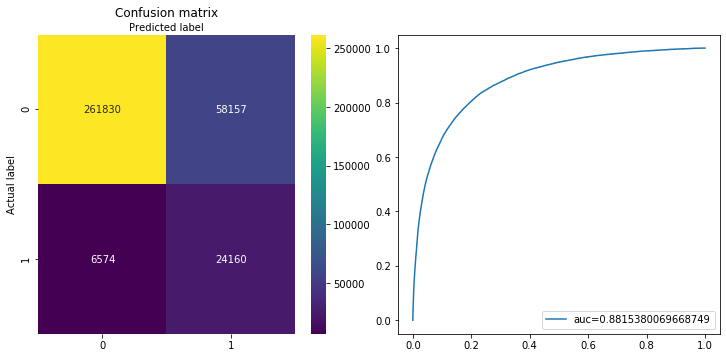

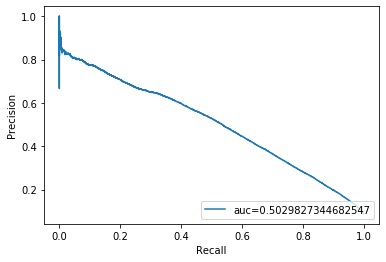

Accuracy :  0.8154344906635189
Sensitivity :  0.8182519914871542
Specificity :  0.7861000845968634
G Mean Score: 0.802
Precision: 0.293
Recall: 0.786
F1 Score: 0.427
ROC AUC: 0.882
Precision-Recall AUC: 0.503


In [6]:
#test-train split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

#Over Sampling
over = SMOTE(sampling_strategy=0.5)

#Under Sampling
under = RandomUnderSampler(sampling_strategy=1.0)

#Defining Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

# Predictions
y_pred=pipeline.predict(x_test)

#Printing results
model_results(pipeline,y_test, y_pred,x_test)

### With L2 Regularization

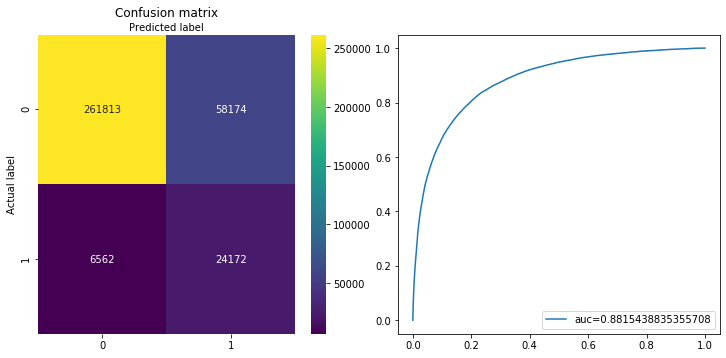

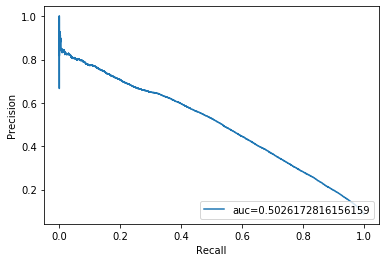

Accuracy :  0.8154202343173064
Sensitivity :  0.8181988643288634
Specificity :  0.7864905316587493
G Mean Score: 0.802
Precision: 0.294
Recall: 0.786
F1 Score: 0.428
ROC AUC: 0.882
Precision-Recall AUC: 0.503


In [7]:
#Defining Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('m', LogisticRegression(penalty="l2"))]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

# Predictions
y_pred=pipeline.predict(x_test)

#Printing results
model_results(pipeline,y_test, y_pred,x_test)

### AdaBoost on Logistic Regression

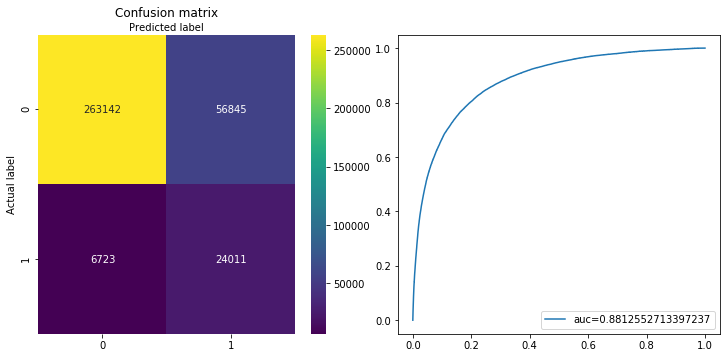

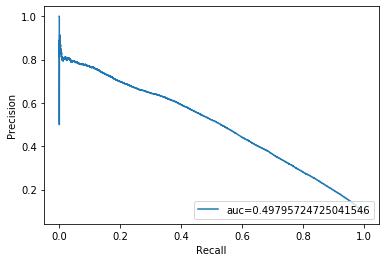

Accuracy :  0.8187505167925502
Sensitivity :  0.822352158056421
Specificity :  0.7812520335784473
G Mean Score: 0.802
Precision: 0.297
Recall: 0.781
F1 Score: 0.430
ROC AUC: 0.881
Precision-Recall AUC: 0.498


In [8]:
#Defining AdaBoost Model
model = AdaBoostClassifier(base_estimator = LogisticRegression(penalty="l2"), n_estimators = 20)

#Defining Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('m', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

#Predictions
y_pred=pipeline.predict(x_test)

#Printing Results
model_results(pipeline,y_test, y_pred,x_test)

# Neural Networks 

Epoch 1/5
960772/960772 [==============================] - 64s 67us/step - loss: 0.4267
Epoch 2/5
960772/960772 [==============================] - 62s 64us/step - loss: 0.4091
Epoch 3/5
960772/960772 [==============================] - 58s 60us/step - loss: 0.3946
Epoch 4/5
960772/960772 [==============================] - 58s 61us/step - loss: 0.3873
Epoch 5/5
960772/960772 [==============================] - 57s 60us/step - loss: 0.3818


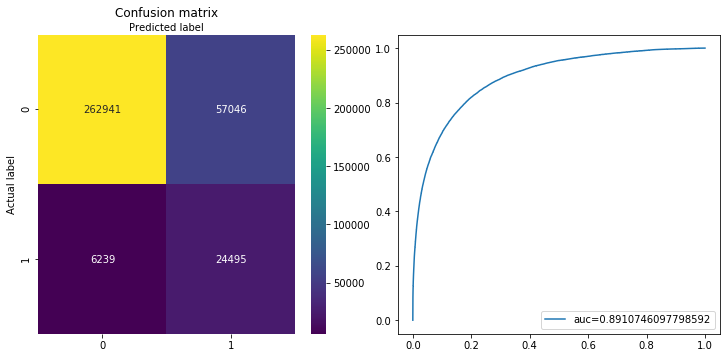

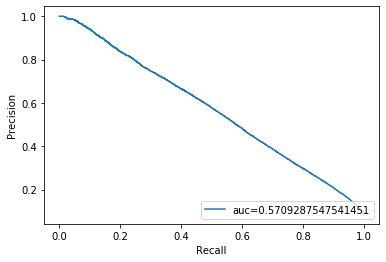

Accuracy :  0.8195574259881786
Sensitivity :  0.8217240075378063
Specificity :  0.7970000650745103
G Mean Score: 0.809
Precision: 0.300
Recall: 0.797
F1 Score: 0.436
ROC AUC: 0.891
Precision-Recall AUC: 0.571


In [9]:
# Test Train Split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

# Defining Neural Network model
def define_model():  
    # define model
    model = Sequential()
    # define first hidden layer and visible layer
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=32,activation='softmax'))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    opt = Adam()
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 
#Building Keras Classifier
model = KerasClassifier(build_fn=define_model,epochs =5, batch_size = 21)

# Defining Samplers
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1.0)

# Defining Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)

# fit model
history = pipeline.fit(x_train, y_train)

# Predictions
y_pred = pipeline.predict(x_test)

#Printing Results
model_results(pipeline,y_test, y_pred.ravel(),x_test)

### With L2 Regularization

Epoch 1/5
960772/960772 [==============================] - 61s 63us/step - loss: 0.5626
Epoch 2/5
960772/960772 [==============================] - 58s 60us/step - loss: 0.4967
Epoch 3/5
960772/960772 [==============================] - 58s 61us/step - loss: 0.4907
Epoch 4/5
960772/960772 [==============================] - 57s 59us/step - loss: 0.4874
Epoch 5/5
960772/960772 [==============================] - 58s 60us/step - loss: 0.4865


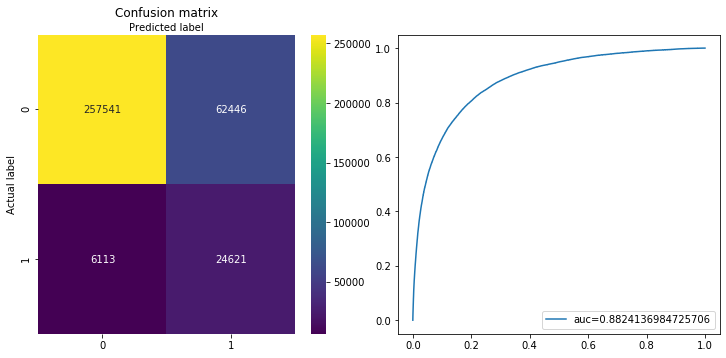

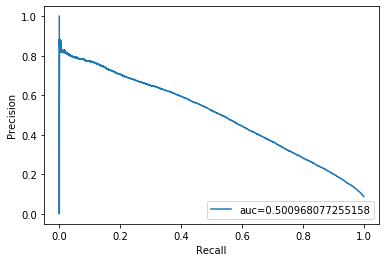

Accuracy :  0.8045198320032162
Sensitivity :  0.8048483219630798
Specificity :  0.8010997592243119
G Mean Score: 0.803
Precision: 0.283
Recall: 0.801
F1 Score: 0.418
ROC AUC: 0.882
Precision-Recall AUC: 0.501


In [10]:
# Test Train Split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

# Defining Neural Network model
def define_model():
    # define model
    model = Sequential()
    # define first hidden layer and visible layer
    model.add(Dropout(0.2, input_shape=(10,)))
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(units=32,activation='relu',kernel_regularizer = regularizers.l2(1e-8),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    opt = SGD(lr=0.00001, momentum=0.9, decay = 1e-7)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 

#Building Keras Classifier
model = KerasClassifier(build_fn=define_model,epochs =5, batch_size = 21)

# Defining Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)

# fit model
history = pipeline.fit(x_train, y_train)

# Predictions
y_pred = pipeline.predict(x_test)

#Printing Results
model_results(pipeline,y_test, y_pred.ravel(),x_test)

### Reduce on plateau

Epoch 1/5
960772/960772 [==============================] - 61s 63us/step - loss: 0.6020
Epoch 2/5
960772/960772 [==============================] - 60s 62us/step - loss: 0.5051
Epoch 3/5
960772/960772 [==============================] - 58s 61us/step - loss: 0.4938
Epoch 4/5
960772/960772 [==============================] - 60s 62us/step - loss: 0.4900
Epoch 5/5
960772/960772 [==============================] - 60s 62us/step - loss: 0.4872


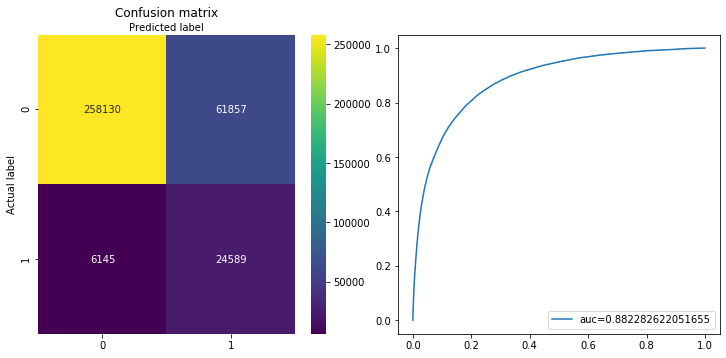

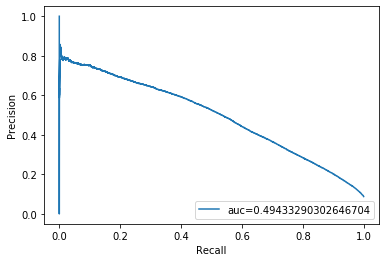

Accuracy :  0.8061079889712905
Sensitivity :  0.8066890217415082
Specificity :  0.8000585670592829
G Mean Score: 0.803
Precision: 0.284
Recall: 0.800
F1 Score: 0.420
ROC AUC: 0.882
Precision-Recall AUC: 0.494


In [11]:
# Reduce on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# Define Keras model
model = KerasClassifier(build_fn=define_model,epochs =5, batch_size = 21,callbacks=[rlrop])

# Define pipeline
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Predictions
y_pred = pipeline.predict(x_test)

# Printing Results
model_results(pipeline,y_test, y_pred.ravel(),x_test)

### AdaBoost on Neural Networks

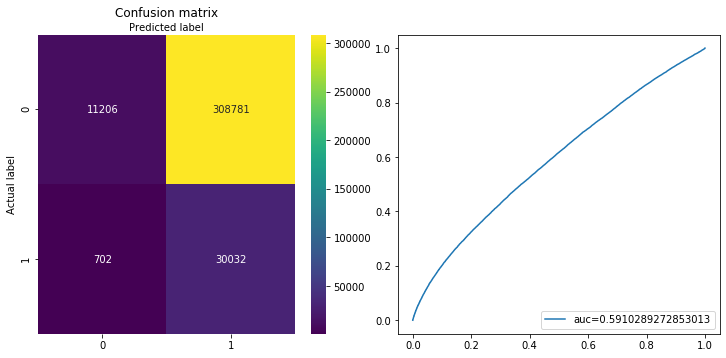

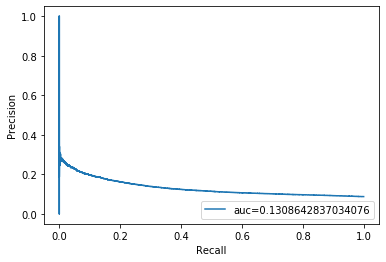

Accuracy :  0.11758064102235109
Sensitivity :  0.03502017269451572
Specificity :  0.9771588468796772
G Mean Score: 0.185
Precision: 0.089
Recall: 0.977
F1 Score: 0.163
ROC AUC: 0.591
Precision-Recall AUC: 0.131


In [12]:

#Define AdaBoost model
model = AdaBoostClassifier(base_estimator = KerasClassifier(build_fn = define_model,epochs = 5, batch_size = 300,  verbose=0), n_estimators = 5, random_state = 1)

#Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

### Neural Networks with Bagging Classifier

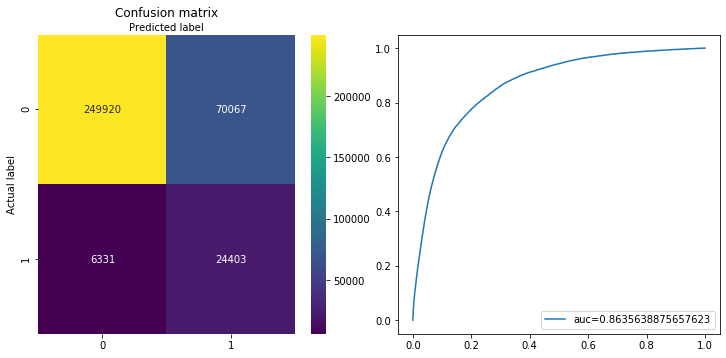

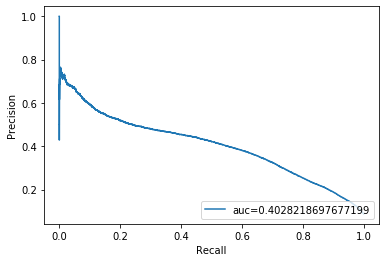

Accuracy :  0.7821687324112329
Sensitivity :  0.7810317294140074
Specificity :  0.7940066376000521
G Mean Score: 0.787
Precision: 0.258
Recall: 0.794
F1 Score: 0.390
ROC AUC: 0.864
Precision-Recall AUC: 0.403


In [13]:
# Define Bagging Classifier
model = BaggingClassifier(base_estimator = KerasClassifier(build_fn=define_model,epochs =5, batch_size = 300, verbose = 0) , n_estimators = 5, random_state = 1)

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)

# Fit model
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# Decision Tree Classifier

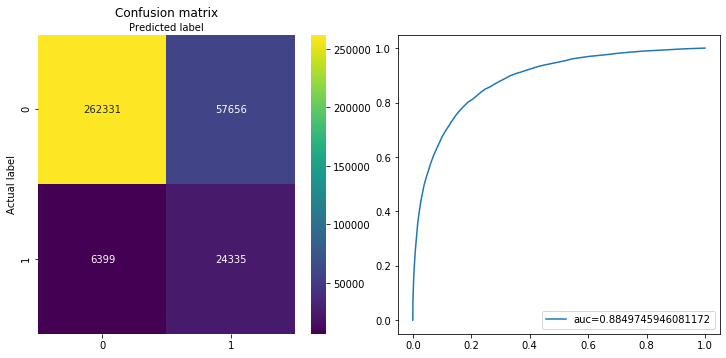

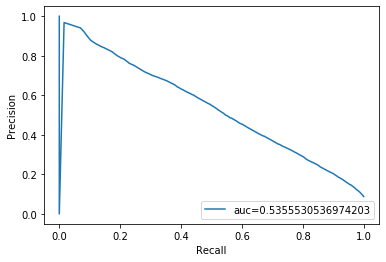

Accuracy :  0.8173619486714511
Sensitivity :  0.8198176800932538
Specificity :  0.7917941042493655
G Mean Score: 0.806
Precision: 0.297
Recall: 0.792
F1 Score: 0.432
ROC AUC: 0.885
Precision-Recall AUC: 0.536


In [14]:
# Define Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth = 8)

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

### Bagging classifier

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


accuracy :
0.8127978321069355


{'whiskers': [<matplotlib.lines.Line2D at 0x26e0b968f60>,
 'caps': [<matplotlib.lines.Line2D at 0x26e0b959908>,
 'boxes': [<matplotlib.lines.Line2D at 0x26e0b968e10>],
 'medians': [<matplotlib.lines.Line2D at 0x26e0b959f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e9be95668>],
 'means': [<matplotlib.lines.Line2D at 0x26e0b959f60>]}

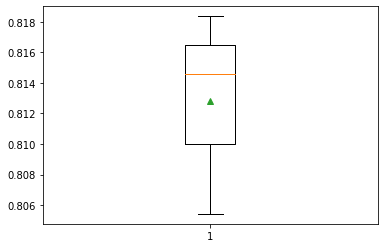

In [15]:
# Define Bagging Classifier 
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth = 8) , n_estimators = 10) 

#Define Pipeline
steps = [('over', over), ('under', under),('pca', PCA(n_components=10)),('m', model)]
pipeline = Pipeline(steps=steps)

# Define K-fold Cross validation
cv = model_selection.KFold(n_splits = 3,random_state = 1)
results = model_selection.cross_val_score(pipeline, x_train, y_train, cv = cv)

# Printing Results
print("accuracy :")
print(results.mean())
plt.boxplot(results, showmeans=True)

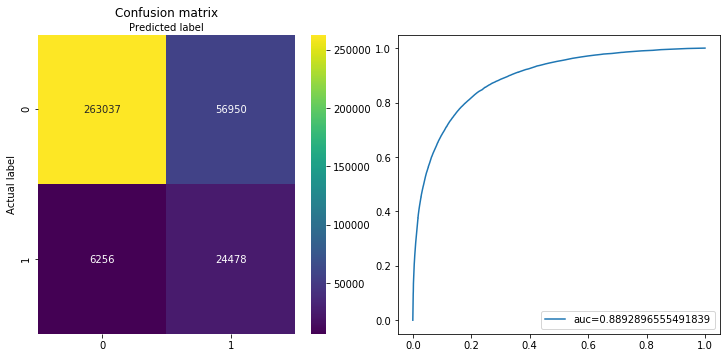

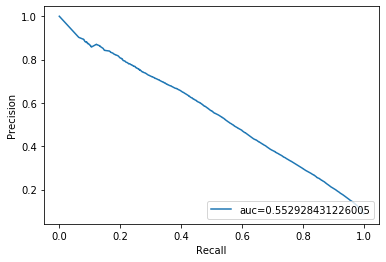

Accuracy :  0.8197826762583365
Sensitivity :  0.8220240197258014
Specificity :  0.7964469317368387
G Mean Score: 0.809
Precision: 0.301
Recall: 0.796
F1 Score: 0.436
ROC AUC: 0.889
Precision-Recall AUC: 0.553


In [16]:
# Define Bagging Classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 8) , n_estimators = 10, random_state = 1) 

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

### AdaBoost

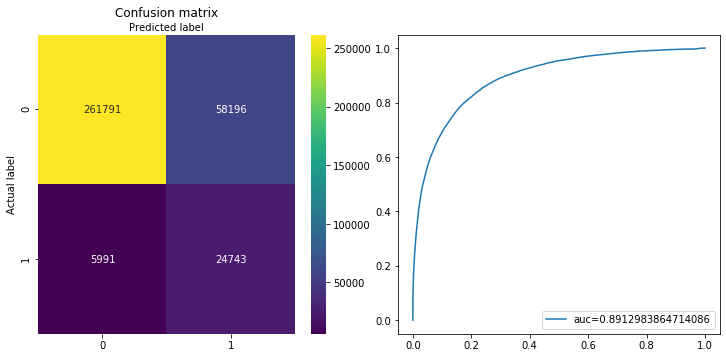

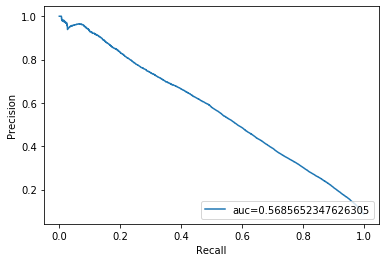

Accuracy :  0.8169855811314407
Sensitivity :  0.8181301115357812
Specificity :  0.8050693043534848
G Mean Score: 0.812
Precision: 0.298
Recall: 0.805
F1 Score: 0.435
ROC AUC: 0.891
Precision-Recall AUC: 0.569


In [17]:
# Define AdaBoost Model
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth = 8) , n_estimators = 10, learning_rate= 0.1, random_state = 1) 

# Define pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# Gradient Boosting Classifier

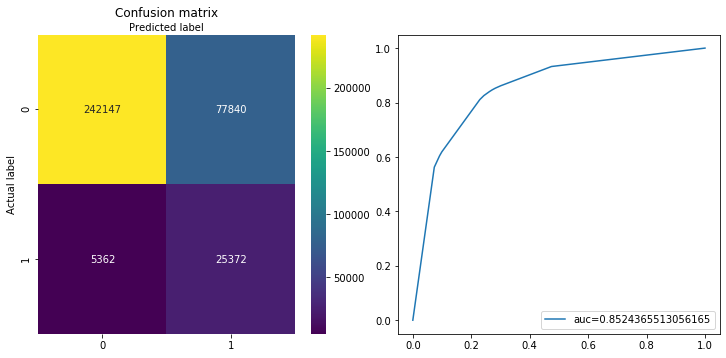

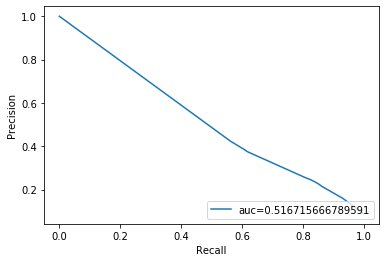

Accuracy :  0.7627686964852404
Sensitivity :  0.7567401175672762
Specificity :  0.8255352378473352
G Mean Score: 0.790
Precision: 0.246
Recall: 0.826
F1 Score: 0.379
ROC AUC: 0.852
Precision-Recall AUC: 0.517


In [18]:
# Define Gradient Boosting Classifier
model = GradientBoostingClassifier(max_depth = 1,n_estimators = 10, learning_rate= 0.1, random_state = 1) 

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

### Hist Gradient Boosting Classifier

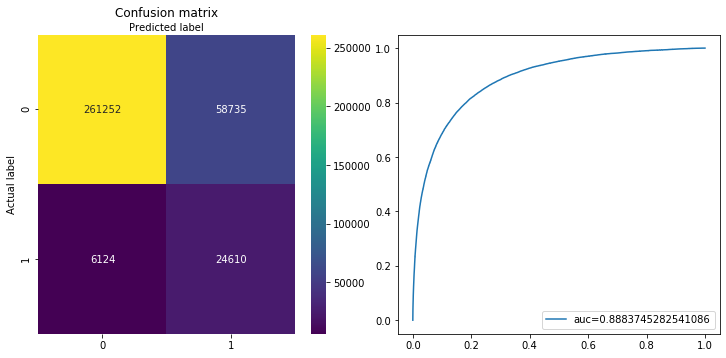

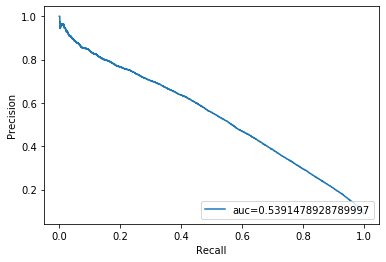

Accuracy :  0.8150695282004784
Sensitivity :  0.8164456681052668
Specificity :  0.8007418494175831
G Mean Score: 0.809
Precision: 0.295
Recall: 0.801
F1 Score: 0.431
ROC AUC: 0.888
Precision-Recall AUC: 0.539


In [19]:
# Define HistGradientBoosting Model
model = HistGradientBoostingClassifier(max_depth = 2, max_iter = 500, random_state = 1, loss='auto')

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# XGB Classifier

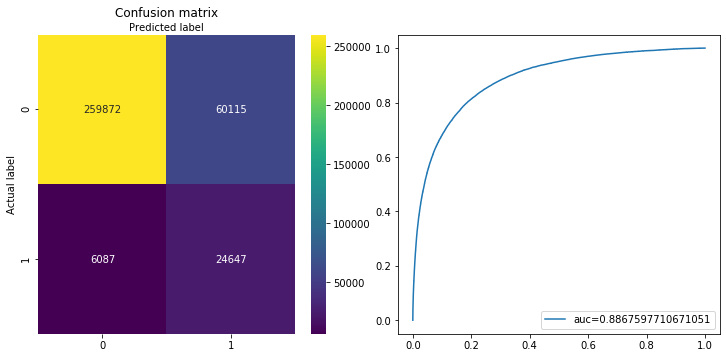

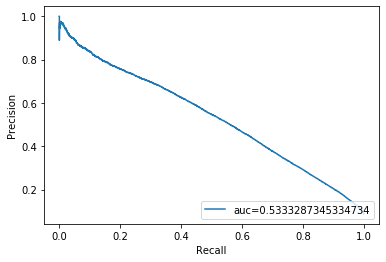

Accuracy :  0.8112402736077965
Sensitivity :  0.8121329929028367
Specificity :  0.8019457278583979
G Mean Score: 0.807
Precision: 0.291
Recall: 0.802
F1 Score: 0.427
ROC AUC: 0.887
Precision-Recall AUC: 0.533


In [20]:
# Define XGB Classifier
model = XGBClassifier(max_depth = 2, random_state = 1) 

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# Random Forest Classifier

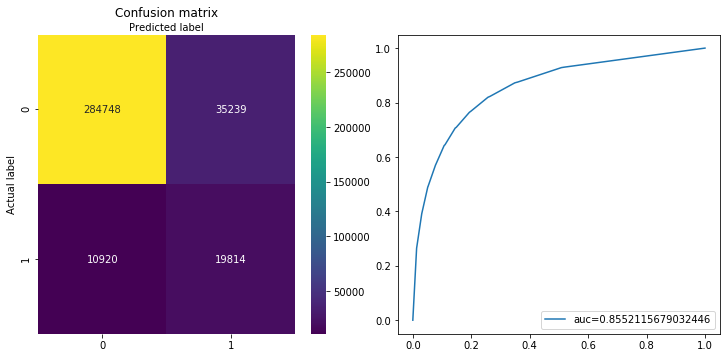

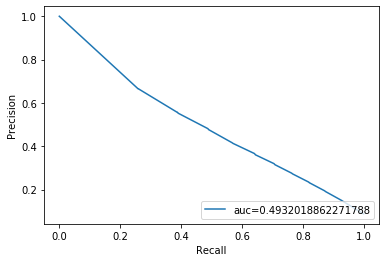

Accuracy :  0.8683882630352902
Sensitivity :  0.8898736511170766
Specificity :  0.644693173683868
G Mean Score: 0.757
Precision: 0.360
Recall: 0.645
F1 Score: 0.462
ROC AUC: 0.855
Precision-Recall AUC: 0.493


In [21]:
# Define Random Forest Model
model = RandomForestClassifier(n_estimators=10)

# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# Naive Bayes 

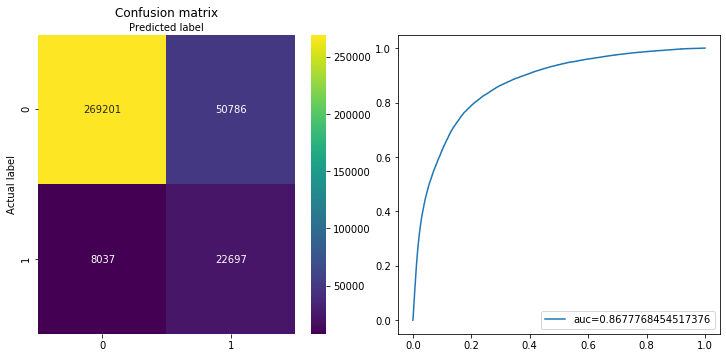

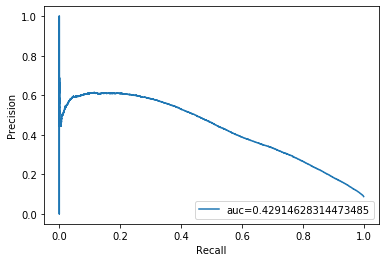

Accuracy :  0.8322797893482283
Sensitivity :  0.8412873022966558
Specificity :  0.7384980803019457
G Mean Score: 0.788
Precision: 0.309
Recall: 0.738
F1 Score: 0.436
ROC AUC: 0.868
Precision-Recall AUC: 0.429


In [22]:
# Define Pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('m', GaussianNB())]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test,y_pred,x_test)

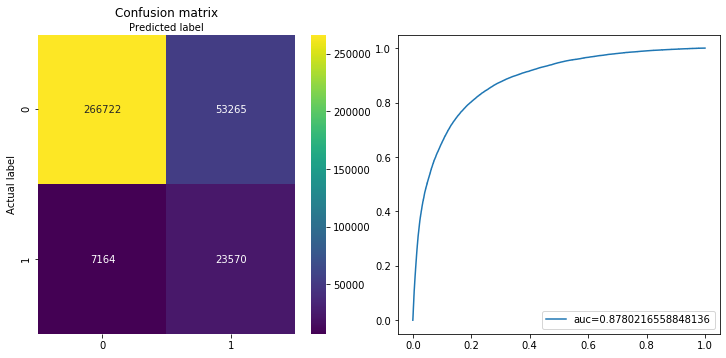

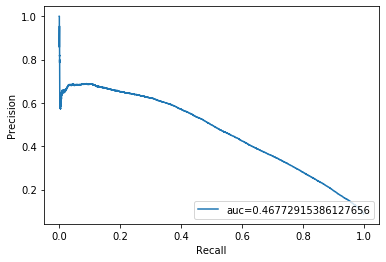

Accuracy :  0.8277006509447681
Sensitivity :  0.833540112567073
Specificity :  0.766903104054142
G Mean Score: 0.800
Precision: 0.307
Recall: 0.767
F1 Score: 0.438
ROC AUC: 0.878
Precision-Recall AUC: 0.468


In [23]:
# Define AdaBoost Model
model = AdaBoostClassifier(base_estimator = GaussianNB() , n_estimators = 10, learning_rate= 0.1, random_state = 1) 

# Define pipeline
steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model', model)]
pipeline = Pipeline(steps=steps)
history = pipeline.fit(x_train, y_train)

# Evaluate model
y_pred = pipeline.predict(x_test)
model_results(pipeline,y_test, y_pred,x_test)

# Ensembling multiple classifiers

Accuracy: 0.80 (+/- 0.00041) [Logistic Regression]
Accuracy: 0.81 (+/- 0.00054) [HistGradientBoosting]


C:\Users\narra\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\narra\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\narra\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80 (+/- 0.00043) [Neural Nets]
Accuracy: 0.81 (+/- 0.00047) [AdaBoost]


C:\Users\narra\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The estimator Pipeline should be a classifier.

  FitFailedWarning)


Accuracy: nan (+/- nan) [Ensemble]


C:\Users\narra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\narra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\narra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\narra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


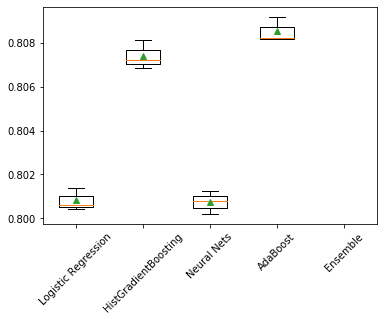

In [25]:
# Define neural net model
def define_model():
    # define model
    model = Sequential()
    # define first hidden layer and visible layer
    model.add(Dropout(0.2, input_shape=(10,)))
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(units=32,activation='relu',kernel_regularizer = regularizers.l2(1e-8),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    opt = SGD(lr=0.00001, momentum=0.9, decay = 1e-7)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# Declare Varibles
models, pipeline = dict(), dict()

# Define Classifiers
models[1] = LogisticRegression(random_state=1)
models[2] = HistGradientBoostingClassifier(max_depth = 2, max_iter = 500, random_state = 1, loss='auto') 
models[3] = KerasClassifier(build_fn = define_model, epochs =5, batch_size = 21, verbose = 0)
models[3]._estimator_type = "classifier"
models[4] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth = 8) , n_estimators = 10, learning_rate= 0.1, random_state = 1) 

# Creating model pipelines
for i in range(1,5):
    steps = [('over', over),('under', under),('pca', PCA(n_components=10)),('model',  models[i])]
    pipeline[i] = Pipeline(steps=steps)
pipeline[5] = VotingClassifier(estimators=[('hgb', pipeline[2]),
                                           ('nn', pipeline[3]),
                                           ('adb',pipeline[4])], voting='soft', weights=[1,1,1])

# Declare variables
results, names = list(), list()

# Perform K-fold validation
for clf, label in zip(pipeline, ['Logistic Regression', 'HistGradientBoosting', 'Neural Nets','AdaBoost','Ensemble']):
    metric = make_scorer(imetrics.geometric_mean_score)
    scores = model_selection.cross_val_score(pipeline[clf], x_train, y_train,scoring=metric, cv = 3)
    results.append(scores)
    names.append(label)
    print("Accuracy: %0.2f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))

# Plot results
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()   

# Final Model

Accuracy :  0.8162356973206623
Sensitivity :  0.8175832143180817
Specificity :  0.8022060258996551
G Mean Score: 0.810
Precision: 0.297
Recall: 0.802
F1 Score: 0.433
ROC AUC: 0.810


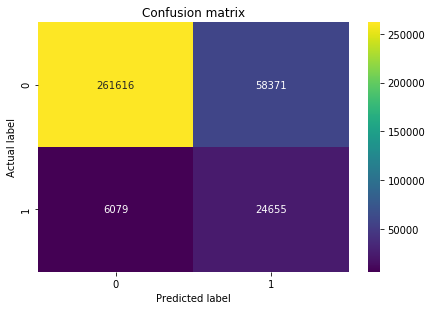

In [26]:
# Define Neural Network Model
def define_model():
    # define model
    model = Sequential()
    # define first hidden layer and visible layer
    model.add(Dropout(0.2, input_shape=(10,)))
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(units=32,activation='relu',kernel_regularizer = regularizers.l2(1e-8),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    opt = SGD(lr=0.00001, momentum=0.9, decay = 1e-7)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# Define HistGradientBoosting moel
hgb = HistGradientBoostingClassifier(max_depth = 2, max_iter = 500, random_state = 1, loss='auto')

# Define keras classifier
nn_model = KerasClassifier(build_fn = define_model, epochs =5, batch_size = 21, verbose = 0)
nn_model._estimator_type = "classifier"

# Define Adaboost Classifier
ada_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth = 8) , n_estimators = 10, learning_rate= 0.1, random_state = 1) 

# Make an ensemble
ensemble = VotingClassifier(estimators=[('hgb', hgb),
                                        ('nn',nn_model),
                                        ('ada_model',ada_model)
                                       ],
                             voting = 'soft', weights =[1,1,1])

# Define pipeline
ensemble_pipe = Pipeline([('over', over),('under',under),('pca', PCA(n_components=10)),('ensemble', ensemble)])

# Fit Model
history = ensemble_pipe.fit(x_train, y_train)

# Predictions
y_pred = ensemble_pipe.predict(x_test)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Print Results
print('Accuracy : ', (cnf_matrix[0,0]+cnf_matrix[1,1])/sum(sum(cnf_matrix)))
print('Sensitivity : ', cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
print('Specificity : ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("G Mean Score: %.3f" %imetrics.geometric_mean_score(y_test, y_pred))
print("Precision: %.3f" %metrics.precision_score(y_test, y_pred))
print("Recall: %.3f" %metrics.recall_score(y_test, y_pred))
print("F1 Score: %.3f" %metrics.f1_score(y_test, y_pred))
print("ROC AUC: %.3f" %metrics.roc_auc_score(y_test, y_pred))